In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('../../Datasets/diabetes.csv',usecols=['Glucose','BMI','Outcome'])

In [5]:
df.head()

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1


In [6]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [12]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

C:\Users\kumud\AppData\Local\Temp\ipykernel_18464\3138402424.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Glucose'])


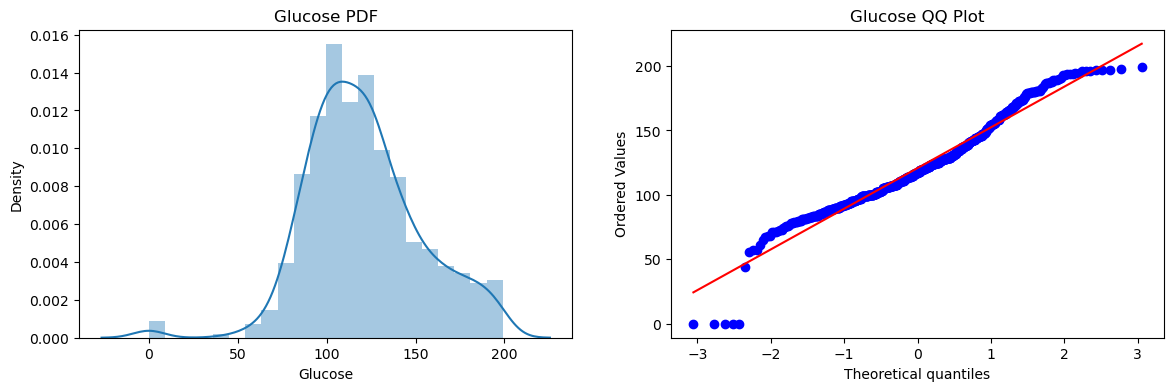

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Glucose'])
plt.title('Glucose PDF')

plt.subplot(122)
stats.probplot(X_train['Glucose'], dist="norm", plot=plt)
plt.title('Glucose QQ Plot')

plt.show()

C:\Users\kumud\AppData\Local\Temp\ipykernel_18464\2606131413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['BMI'])


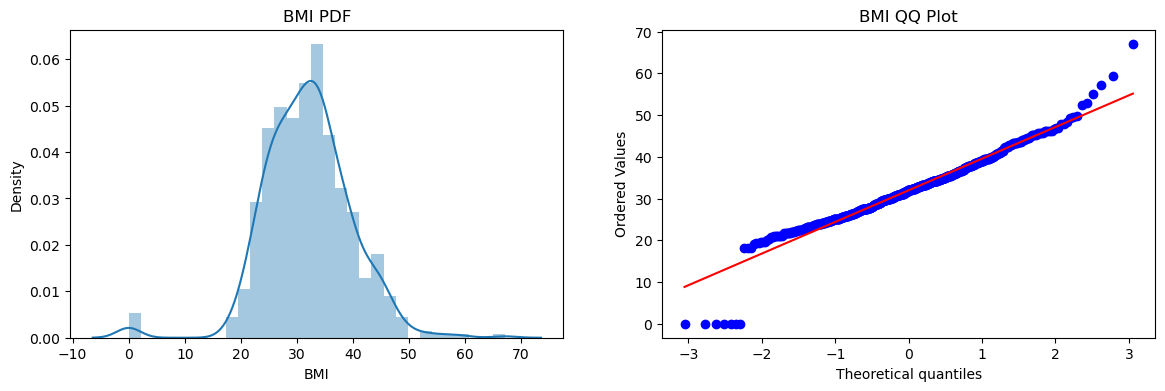

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['BMI'])
plt.title('BMI PDF')

plt.subplot(122)
stats.probplot(X_train['BMI'], dist="norm", plot=plt)
plt.title('BMI QQ Plot')

plt.show()

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred1))

Accuracy LR 0.7662337662337663
Accuracy DT 0.7337662337662337


In [19]:
trf = FunctionTransformer(func=np.log1p)

In [20]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred1))

Accuracy LR 0.7792207792207793
Accuracy DT 0.7402597402597403


In [22]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

d:\Development\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
d:\Development\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Development\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LR 0.05208475734791525
DT 0.9530929596719071


d:\Development\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Development\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


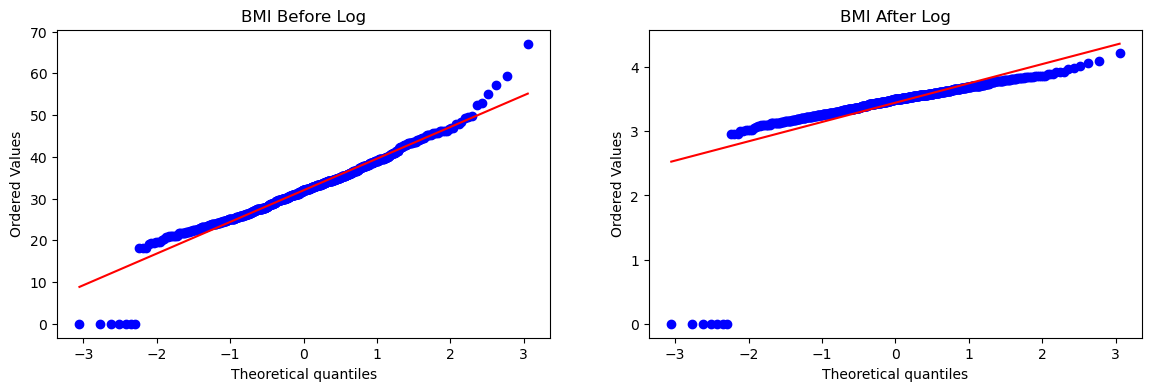

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['BMI'], dist="norm", plot=plt)
plt.title('BMI Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['BMI'], dist="norm", plot=plt)
plt.title('BMI After Log')

plt.show()

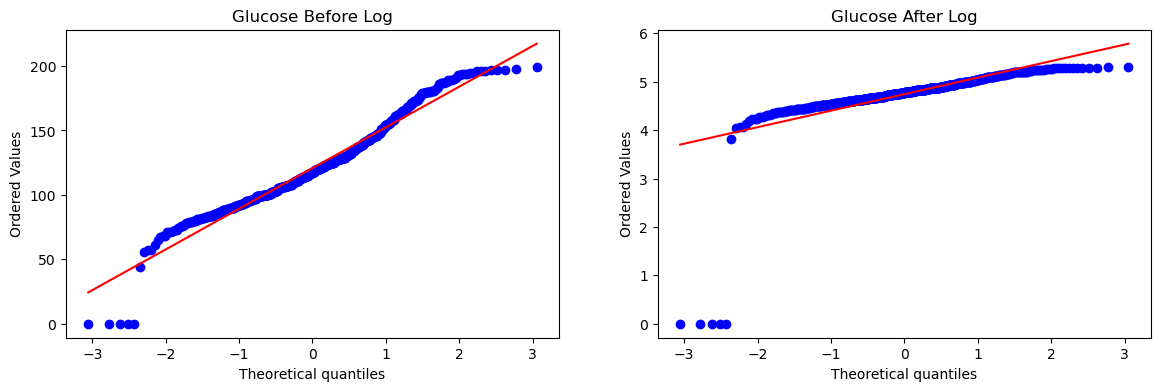

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Glucose'], dist="norm", plot=plt)
plt.title('Glucose Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Glucose'], dist="norm", plot=plt)
plt.title('Glucose After Log')

plt.show()

In [28]:
def apply_transform(transform):
    X = df.iloc[:,0:2]
    y = df.iloc[:,2]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Glucose'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Glucose'], dist="norm", plot=plt)
    plt.title('Glucose Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Glucose After Transform')

    plt.show()
    

Accuracy 0.7603725222146276


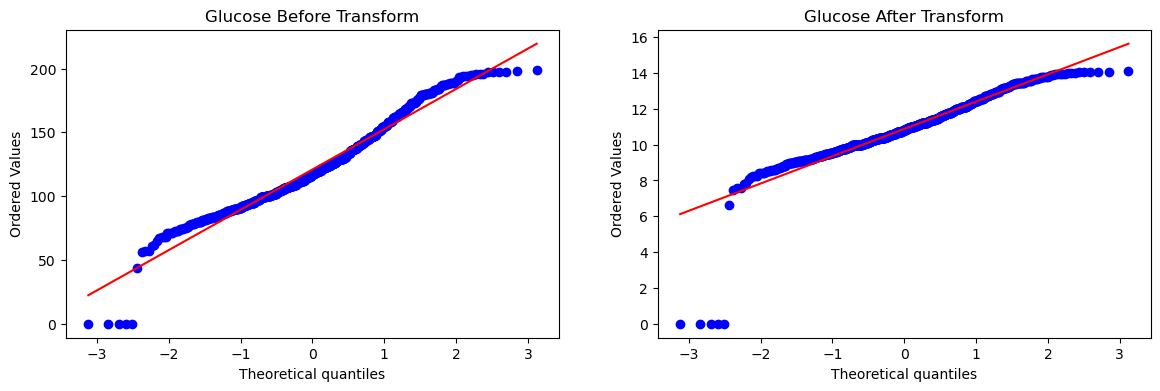

In [29]:
apply_transform(lambda x: x**(1/2))

Accuracy 0.7564935064935066


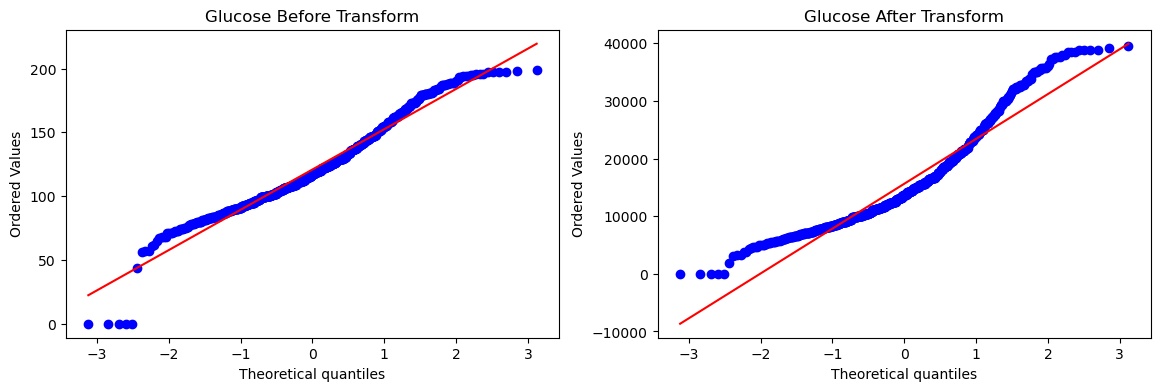

In [30]:
apply_transform(lambda x: x**2)

Accuracy 0.6588345864661654


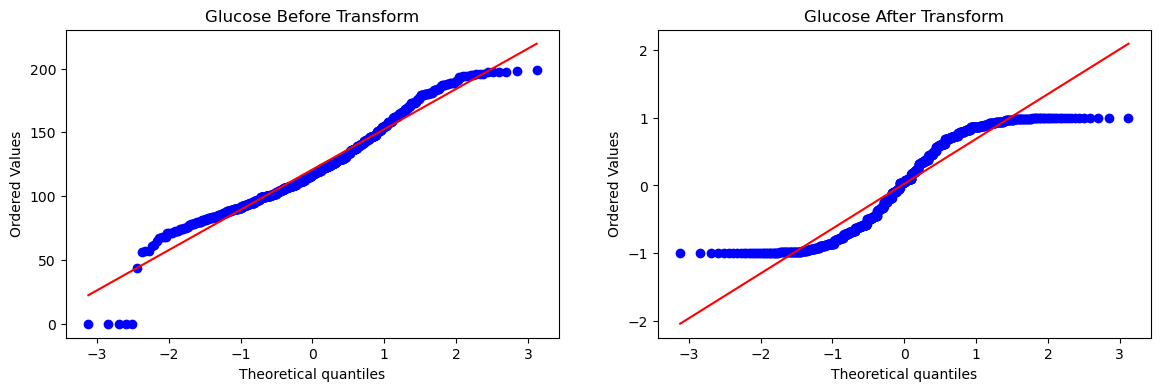

In [33]:
apply_transform(np.cos)